In [31]:
import cvxpy as cp
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import KernelPCA

In [8]:
# Generate a random SDP.
n = 3
p = 3
np.random.seed(1)
C = np.random.randn(n, n)
A = []
b = []
for i in range(p):
    A.append(np.random.randn(n, n))
    b.append(np.random.randn())

# Define and solve the CVXPY problem.
# Create a symmetric matrix variable.
X = cp.Variable((n,n), symmetric=True)
# The operator >> denotes matrix inequality.
constraints = [X >> 0]
constraints += [
    cp.trace(A[i] @ X) == b[i] for i in range(p)
]
print("defining problem...")
prob = cp.Problem(cp.Minimize(cp.trace(C @ X)),
                  constraints)
print("solving the problem...")
prob.solve(verbose=True)

# Print result.
print("The optimal value is", prob.value)
print("A solution X is")
print(X.value)

defining problem...
solving the problem...
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) Jul 24 11:04:43 AM: Your problem has 9 variables, 4 constraints, and 0 parameters.
(CVXPY) Jul 24 11:04:43 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jul 24 11:04:43 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jul 24 11:04:43 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jul 24 11:04:43 AM: Compiling problem (target solver=SCS).
(CVXPY) Jul 24 11:04:43 AM: Reduction chain: Dcp2Cone -

In [54]:
n1, n2 = 10, 15

In [4]:
L = np.ones((n1+n2, n1+n2))

In [9]:
import importlib
import utils as utils
importlib.reload(utils)#reload to ensure the latest version is used

<module 'utils' from 'd:\\Speech Emotion Recognition\\Speech-Emotion-Detection\\code\\utils.py'>

In [10]:
X_ravdess, speaker, file_name, _ = utils.load_wav_features("C:\\Users\\HP\\Downloads\\Ravdess\\audio_speech_actors_01-24")

In [11]:
emotions, utterances= utils.process_ravdess(file_name)

In [12]:
scaler = utils.StandardScaleNormalizer()
X_ravdess_norm = scaler.fit_transform(X_ravdess, speaker)

In [13]:
def k_nearest_neighbor_matrix(data, k):
    """
    Calculate the k-nearest neighbor matrix for a given dataset.

    Parameters:
        data (numpy.ndarray): Input data (n_samples x n_features) for which to find the nearest neighbors.
        k (int): The number of nearest neighbors to consider.

    Returns:
        numpy.ndarray: The k-nearest neighbor matrix (n_samples x n_samples).
    """
    nbrs = NearestNeighbors(n_neighbors=k+1, algorithm='auto').fit(data)
    distances, indices = nbrs.kneighbors(data)

    # Set diagonal elements to infinity, as a point is not its own neighbor
    np.fill_diagonal(distances, np.inf)

    # Create the k-nearest neighbor matrix
    k_nn_matrix = np.zeros((data.shape[0], data.shape[0]))
    # create the distance matrix
    dist_nn_matrrix = np.zeros((data.shape[0], data.shape[0]))
    for i, neighbors in enumerate(indices):
        k_nn_matrix[i, neighbors[1:]] = 1

    return k_nn_matrix

In [14]:
eta = k_nearest_neighbor_matrix(X_ravdess_norm, 5)

In [15]:
X_ravdess_norm = X_ravdess_norm.to_numpy()

In [25]:
n = 500

In [26]:
X_trunc = X_ravdess_norm[:n, ]

In [27]:
X_trunc.shape

(500, 88)

In [28]:
# Define and solve the CVXPY problem.
# Create a symmetric matrix variable.
X = cp.Variable((n,n))
# The operator >> denotes matrix inequality.
constraints = [X >> 0]
constraints += [
    cp.sum(X) - cp.trace(X) == 0
]
constraints += [
    X[i,i] - 2*X[i,j] + X[j,j] == np.linalg.norm(X_trunc[i, :]-X_trunc[j, :], ord=2)**2 for i in range(n) for j in range(n) if eta[i,j] == 1
]
print("defining problem...")
prob = cp.Problem(cp.Minimize(cp.trace(X)),
                  constraints)
print("solving the problem...")
prob.solve(verbose=True)

defining problem...
solving the problem...
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) Jul 24 11:17:23 AM: Your problem has 250000 variables, 1168 constraints, and 0 parameters.
(CVXPY) Jul 24 11:17:23 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jul 24 11:17:23 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jul 24 11:17:23 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jul 24 11:17:23 AM: Compiling problem (target solver=SCS).
(CVXPY) Jul 24 11:17:23 AM: Reduction chain: Dc

2866.2428779916017

In [29]:
# Print result.
print("The optimal value is", prob.value)
print("A solution X is")
print(X.value)

The optimal value is 2866.2428779916017
A solution X is
[[ 1.31401392e+01 -4.38561082e+00 -6.30796908e+00 ...  1.14647947e-02
   1.14647389e-02  1.14650918e-02]
 [-4.38561082e+00  1.48414160e+00 -1.36299516e+01 ...  1.14650344e-02
   1.14649787e-02  1.14653316e-02]
 [ 6.33090834e+00  1.36528791e+01  2.59987575e+00 ...  1.14652211e-02
   1.14651654e-02  1.14655182e-02]
 ...
 [ 1.14647947e-02  1.14650344e-02  1.14652211e-02 ...  1.14662578e-02
   1.14649185e-02 -4.77130047e+01]
 [ 1.14647389e-02  1.14649787e-02  1.14651654e-02 ...  1.14649185e-02
   1.36246136e+01  1.14699946e-02]
 [ 1.14650918e-02  1.14653316e-02  1.14655182e-02 ...  4.77359353e+01
   1.14699946e-02  1.15184627e+01]]


In [30]:
def kernel_pca(K, n_components):
    """
    Apply Kernel PCA to a given kernel matrix.

    Parameters:
        K (numpy.ndarray): The kernel matrix (n_samples x n_samples) representing pairwise similarities.
        n_components (int): The number of leading eigenvectors to select.

    Returns:
        numpy.ndarray: Low-dimensional representations of data points (n_samples x n_components).
    """
    # Center the kernel matrix
    n_samples = K.shape[0]
    one_n = np.ones((n_samples, n_samples)) / n_samples
    K_centered = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Compute eigenvectors and eigenvalues
    eigvals, eigvecs = np.linalg.eigh(K_centered)

    # Select leading eigenvectors
    idx = np.argsort(eigvals)[::-1]
    eigvecs = eigvecs[:, idx]
    leading_eigvecs = eigvecs[:, :n_components]

    return leading_eigvecs


In [36]:
low_dimensional_representations = kernel_pca(X.value, 2)

In [37]:
low_dimensional_representations.shape

(500, 2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


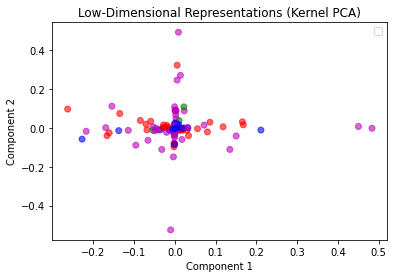

In [46]:
import matplotlib.pyplot as plt
plt.scatter(low_dimensional_representations[:, 0], low_dimensional_representations[:, 1], color = color, alpha=0.6)
plt.title('Low-Dimensional Representations (Kernel PCA)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

In [41]:
emotions_trunc = emotions[:n]

In [42]:
set(emotions_trunc)

{'angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised'}

In [43]:
color = ['r' if l=='angry' else 'b' if l=='happy' else 'g' if l=='sad' else 'y' if l=='neutral' else 'm' for l in emotions_trunc]

In [51]:
def pca_efficiency(kernel_matrix):
    """
    Compute the efficiency of PCA using a given kernel matrix.

    Parameters:
        kernel_matrix (numpy.ndarray): The kernel matrix (n_samples x n_samples) representing pairwise similarities.

    Returns:
        numpy.ndarray, numpy.ndarray: The explained variance ratio and cumulative explained variance ratio.
    """
    # Center the kernel matrix
    n_samples = kernel_matrix.shape[0]
    one_n = np.ones((n_samples, n_samples)) / n_samples
    K_centered = kernel_matrix - one_n.dot(kernel_matrix) - kernel_matrix.dot(one_n) + one_n.dot(kernel_matrix).dot(one_n)

    # Compute eigenvalues and eigenvectors of the centered kernel matrix
    eigvals, eigvecs = np.linalg.eigh(K_centered)

    # Sort eigenvectors by descending eigenvalues
    idx = np.argsort(eigvals)[::-1]
    eigvecs = eigvecs[:, idx]

    # Compute explained variance ratio and cumulative explained variance ratio
    explained_variance_ratio = eigvals[idx] / np.sum(eigvals)
    cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

    return explained_variance_ratio, cumulative_explained_variance_ratio




In [53]:
# Compute PCA efficiency
explained_variance_ratio, cumulative_explained_variance_ratio = pca_efficiency(X.value)

print("Explained Variance Ratio:")
print(explained_variance_ratio)

print("\nCumulative Explained Variance Ratio:")
print(cumulative_explained_variance_ratio)

Explained Variance Ratio:
[ 5.58734282e-02  5.30633045e-02  5.23418467e-02  4.56065245e-02
  4.53828086e-02  4.36230253e-02  4.21941096e-02  4.18312577e-02
  4.06422944e-02  4.04595349e-02  3.95725815e-02  3.92338049e-02
  3.85509704e-02  3.75393378e-02  3.68209833e-02  3.60105719e-02
  3.55253642e-02  3.52888060e-02  3.47151843e-02  3.40731881e-02
  3.32598354e-02  3.16379442e-02  3.00998475e-02  2.98199530e-02
  2.94211997e-02  2.89600278e-02  2.85678932e-02  2.78590564e-02
  2.76214027e-02  2.73118893e-02  2.68845154e-02  2.67929999e-02
  2.60532008e-02  2.57476614e-02  2.55025107e-02  2.54209124e-02
  2.51003527e-02  2.48856983e-02  2.47658045e-02  2.43266880e-02
  2.43114147e-02  2.39625221e-02  2.38200036e-02  2.37735463e-02
  2.33837995e-02  2.30158646e-02  2.29699094e-02  2.24559421e-02
  2.23557951e-02  2.22747715e-02  2.20081906e-02  2.18750551e-02
  2.17534639e-02  2.15995573e-02  2.14825081e-02  2.12700633e-02
  2.12099189e-02  2.10339799e-02  2.08073418e-02  2.05979268e-02

# Trying simple PCA reduction of the feature sets

We have the following : 



In [67]:
# write a fucntion to apply pca to a dataset matrix X and return the low dimensional representation
def pca(X, n_components):
    """
    Apply PCA to a given dataset matrix.

    Parameters:
        X (numpy.ndarray): Input data (n_samples x n_features) for which to find the nearest neighbors.
        n_components (int): The number of leading eigenvectors to select.

    Returns:
        numpy.ndarray: Low-dimensional representations of data points (n_samples x n_components).
    """
    # Center the data
    # n_samples = X.shape[0]
    # one_n = np.ones((n_samples, n_samples)) / n_samples
    # X_centered = X - one_n.dot(X) - X.dot(one_n) + one_n.dot(X).dot(one_n)

    # Compute eigenvectors and eigenvalues
    eigvals, eigvecs = np.linalg.eigh(X.T.dot(X))

    # Select leading eigenvectors
    idx = np.argsort(eigvals)[::-1]
    eigvecs = eigvecs[:, idx]
    leading_eigvecs = eigvecs[:, :n_components]
    
    
    # Project the centered data onto the principal components
    low_dimensional_representations = np.dot(X, leading_eigvecs)
    
    # computing the explained variance ratio
    explained_variance_ratio = eigvals[idx] / np.sum(eigvals)

    return leading_eigvecs, low_dimensional_representations, explained_variance_ratio

In [145]:
X_s, X_ravdess_pca, _  = pca(X_ravdess_norm, 60)

In [146]:
_

array([3.2809365e-01, 6.9096394e-02, 4.6372008e-02, 4.0848970e-02,
       3.3522710e-02, 2.9319242e-02, 2.3629380e-02, 2.2859791e-02,
       2.0131150e-02, 1.8562114e-02, 1.7470688e-02, 1.6267886e-02,
       1.5394949e-02, 1.4517360e-02, 1.4304923e-02, 1.4009918e-02,
       1.3233739e-02, 1.2758368e-02, 1.2468171e-02, 1.1807067e-02,
       1.1451220e-02, 1.1050060e-02, 1.0645751e-02, 1.0274517e-02,
       9.8662693e-03, 9.4880247e-03, 9.2702163e-03, 8.7237479e-03,
       8.2327910e-03, 7.9743937e-03, 7.5045144e-03, 7.4084932e-03,
       7.1416744e-03, 6.8650572e-03, 6.3444762e-03, 5.6136688e-03,
       5.4145399e-03, 5.3377077e-03, 4.8985700e-03, 4.6261884e-03,
       4.4773947e-03, 4.1775499e-03, 3.8552771e-03, 3.7489787e-03,
       3.5511178e-03, 3.3456630e-03, 3.1057727e-03, 3.0439636e-03,
       2.8572972e-03, 2.7864289e-03, 2.6570221e-03, 2.5443193e-03,
       2.4228902e-03, 2.3258214e-03, 2.2453736e-03, 2.1134836e-03,
       1.9278483e-03, 1.8528977e-03, 1.5004190e-03, 1.3335604e

In [82]:
# Define the mapping of speaker IDs to folds
fold_mapping = {
    'Actor_01': 1, 'Actor_02': 1, 'Actor_03': 1, 'Actor_04': 1,
    'Actor_05': 2, 'Actor_06': 2, 'Actor_07': 2, 'Actor_08': 2,
    'Actor_09': 3, 'Actor_10': 3, 'Actor_11': 3, 'Actor_12': 3,
    'Actor_13': 4, 'Actor_14': 4, 'Actor_15': 4, 'Actor_16': 4,
    'Actor_17': 5, 'Actor_18': 5, 'Actor_19': 5, 'Actor_20': 5,
		'Actor_21': 6, 'Actor_22': 6, 'Actor_23': 6, 'Actor_24': 6,
}
ravdess_folds = [f"Fold {fold_mapping.get(x)}" for x in speaker]

# Clustering of the hindi dataset

## Loading the hindi dataset

In [85]:
X_hindi, speaker_hindi, file_name, _ = utils.load_wav_features("D:\\Speech Emotion Recognition\\Speech-Emotion-Detection\\data\\trimmed_hindi_wav\\")

In [86]:
attitude, utterances_hindi= utils.process_hindi(file_name)

In [87]:
scaler_hindi = utils.StandardScaleNormalizer()
X_hindi_norm = scaler_hindi.fit_transform(X_hindi, speaker_hindi)

In [88]:
hindi_data_loader = utils.CustomDataLoader(X_hindi_norm, speaker_hindi, attitude, utterances_hindi)

In [245]:
X_t, X_hindi_pca, _  = pca(X_hindi_norm_wo, 60)

## Getting the transformation matrix

In [246]:
X_a = np.dot(np.dot(X_s, X_s.T), X_t)

In [247]:
X_ravdess_transformed = np.dot(X_ravdess_norm_wo, X_a)
X_hindi_transformed = np.dot(X_hindi_norm_wo, X_t)

In [108]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import GridSearchCV
from sklearn import svm #Import svm model
logo = LeaveOneGroupOut()
fold_generated = logo.split(X_ravdess_transformed, emotions, ravdess_folds)

param_grid = {'C': [ 1, 10, 100, 1000,10000], 
                'gamma': [5,1,0.1,0.01,0.001,0.0001],
                'kernel': ['rbf']}

ml = svm.SVC(probability = True) 
grid = GridSearchCV(ml, param_grid, refit = True, verbose = 4,cv=fold_generated)
    
    # fitting the model for grid search
grid_search=grid.fit(X_ravdess_transformed, emotions)

Fitting 6 folds for each of 30 candidates, totalling 180 fits
[CV 1/6] END ..........C=1, gamma=5, kernel=rbf;, score=0.129 total time=   1.0s
[CV 2/6] END ..........C=1, gamma=5, kernel=rbf;, score=0.138 total time=   1.2s
[CV 3/6] END ..........C=1, gamma=5, kernel=rbf;, score=0.133 total time=   1.0s
[CV 4/6] END ..........C=1, gamma=5, kernel=rbf;, score=0.129 total time=   1.0s
[CV 5/6] END ..........C=1, gamma=5, kernel=rbf;, score=0.133 total time=   1.0s
[CV 6/6] END ..........C=1, gamma=5, kernel=rbf;, score=0.133 total time=   1.0s
[CV 1/6] END ..........C=1, gamma=1, kernel=rbf;, score=0.179 total time=   1.0s
[CV 2/6] END ..........C=1, gamma=1, kernel=rbf;, score=0.154 total time=   0.9s
[CV 3/6] END ..........C=1, gamma=1, kernel=rbf;, score=0.154 total time=   0.8s
[CV 4/6] END ..........C=1, gamma=1, kernel=rbf;, score=0.175 total time=   0.8s
[CV 5/6] END ..........C=1, gamma=1, kernel=rbf;, score=0.188 total time=   0.8s
[CV 6/6] END ..........C=1, gamma=1, kernel=rbf

In [109]:
# Print the best hyperparameters found
print("Tuned SVM Parameters: {}".format(grid_search.best_params_))
# Print the evaluation score of the best hyperparameters
print("Best SVM model average cross-validation accuracy: {:.2f}%".format(grid_search.best_score_*100))

Tuned SVM Parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best SVM model average cross-validation accuracy: 56.39%


In [110]:
prob_sum = grid_search.predict_proba(X_hindi_pca)

In [111]:
labels_ravdess = np.sort(['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised'])
predictions = [labels_ravdess[i] for i in np.argmax(prob_sum, axis=1)]

In [112]:
import pandas as pd
df_labels_new = pd.DataFrame()
df_labels_new["Hindi Attitude"] = attitude
df_labels_new["RAVDESS Labels"] = predictions
df_labels_new_comp = pd.crosstab(df_labels_new["Hindi Attitude"], df_labels_new["RAVDESS Labels"])

C:\Users\HP\AppData\Local\Temp\ipykernel_25412\2183472157.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  sns.heatmap(df_labels_new_comp/df_labels_new_comp.sum(axis=1)[:, np.newaxis], cmap="Blues",square= True, annot=True, annot_kws={'size': 8})


<AxesSubplot:xlabel='RAVDESS Labels', ylabel='Hindi Attitude'>

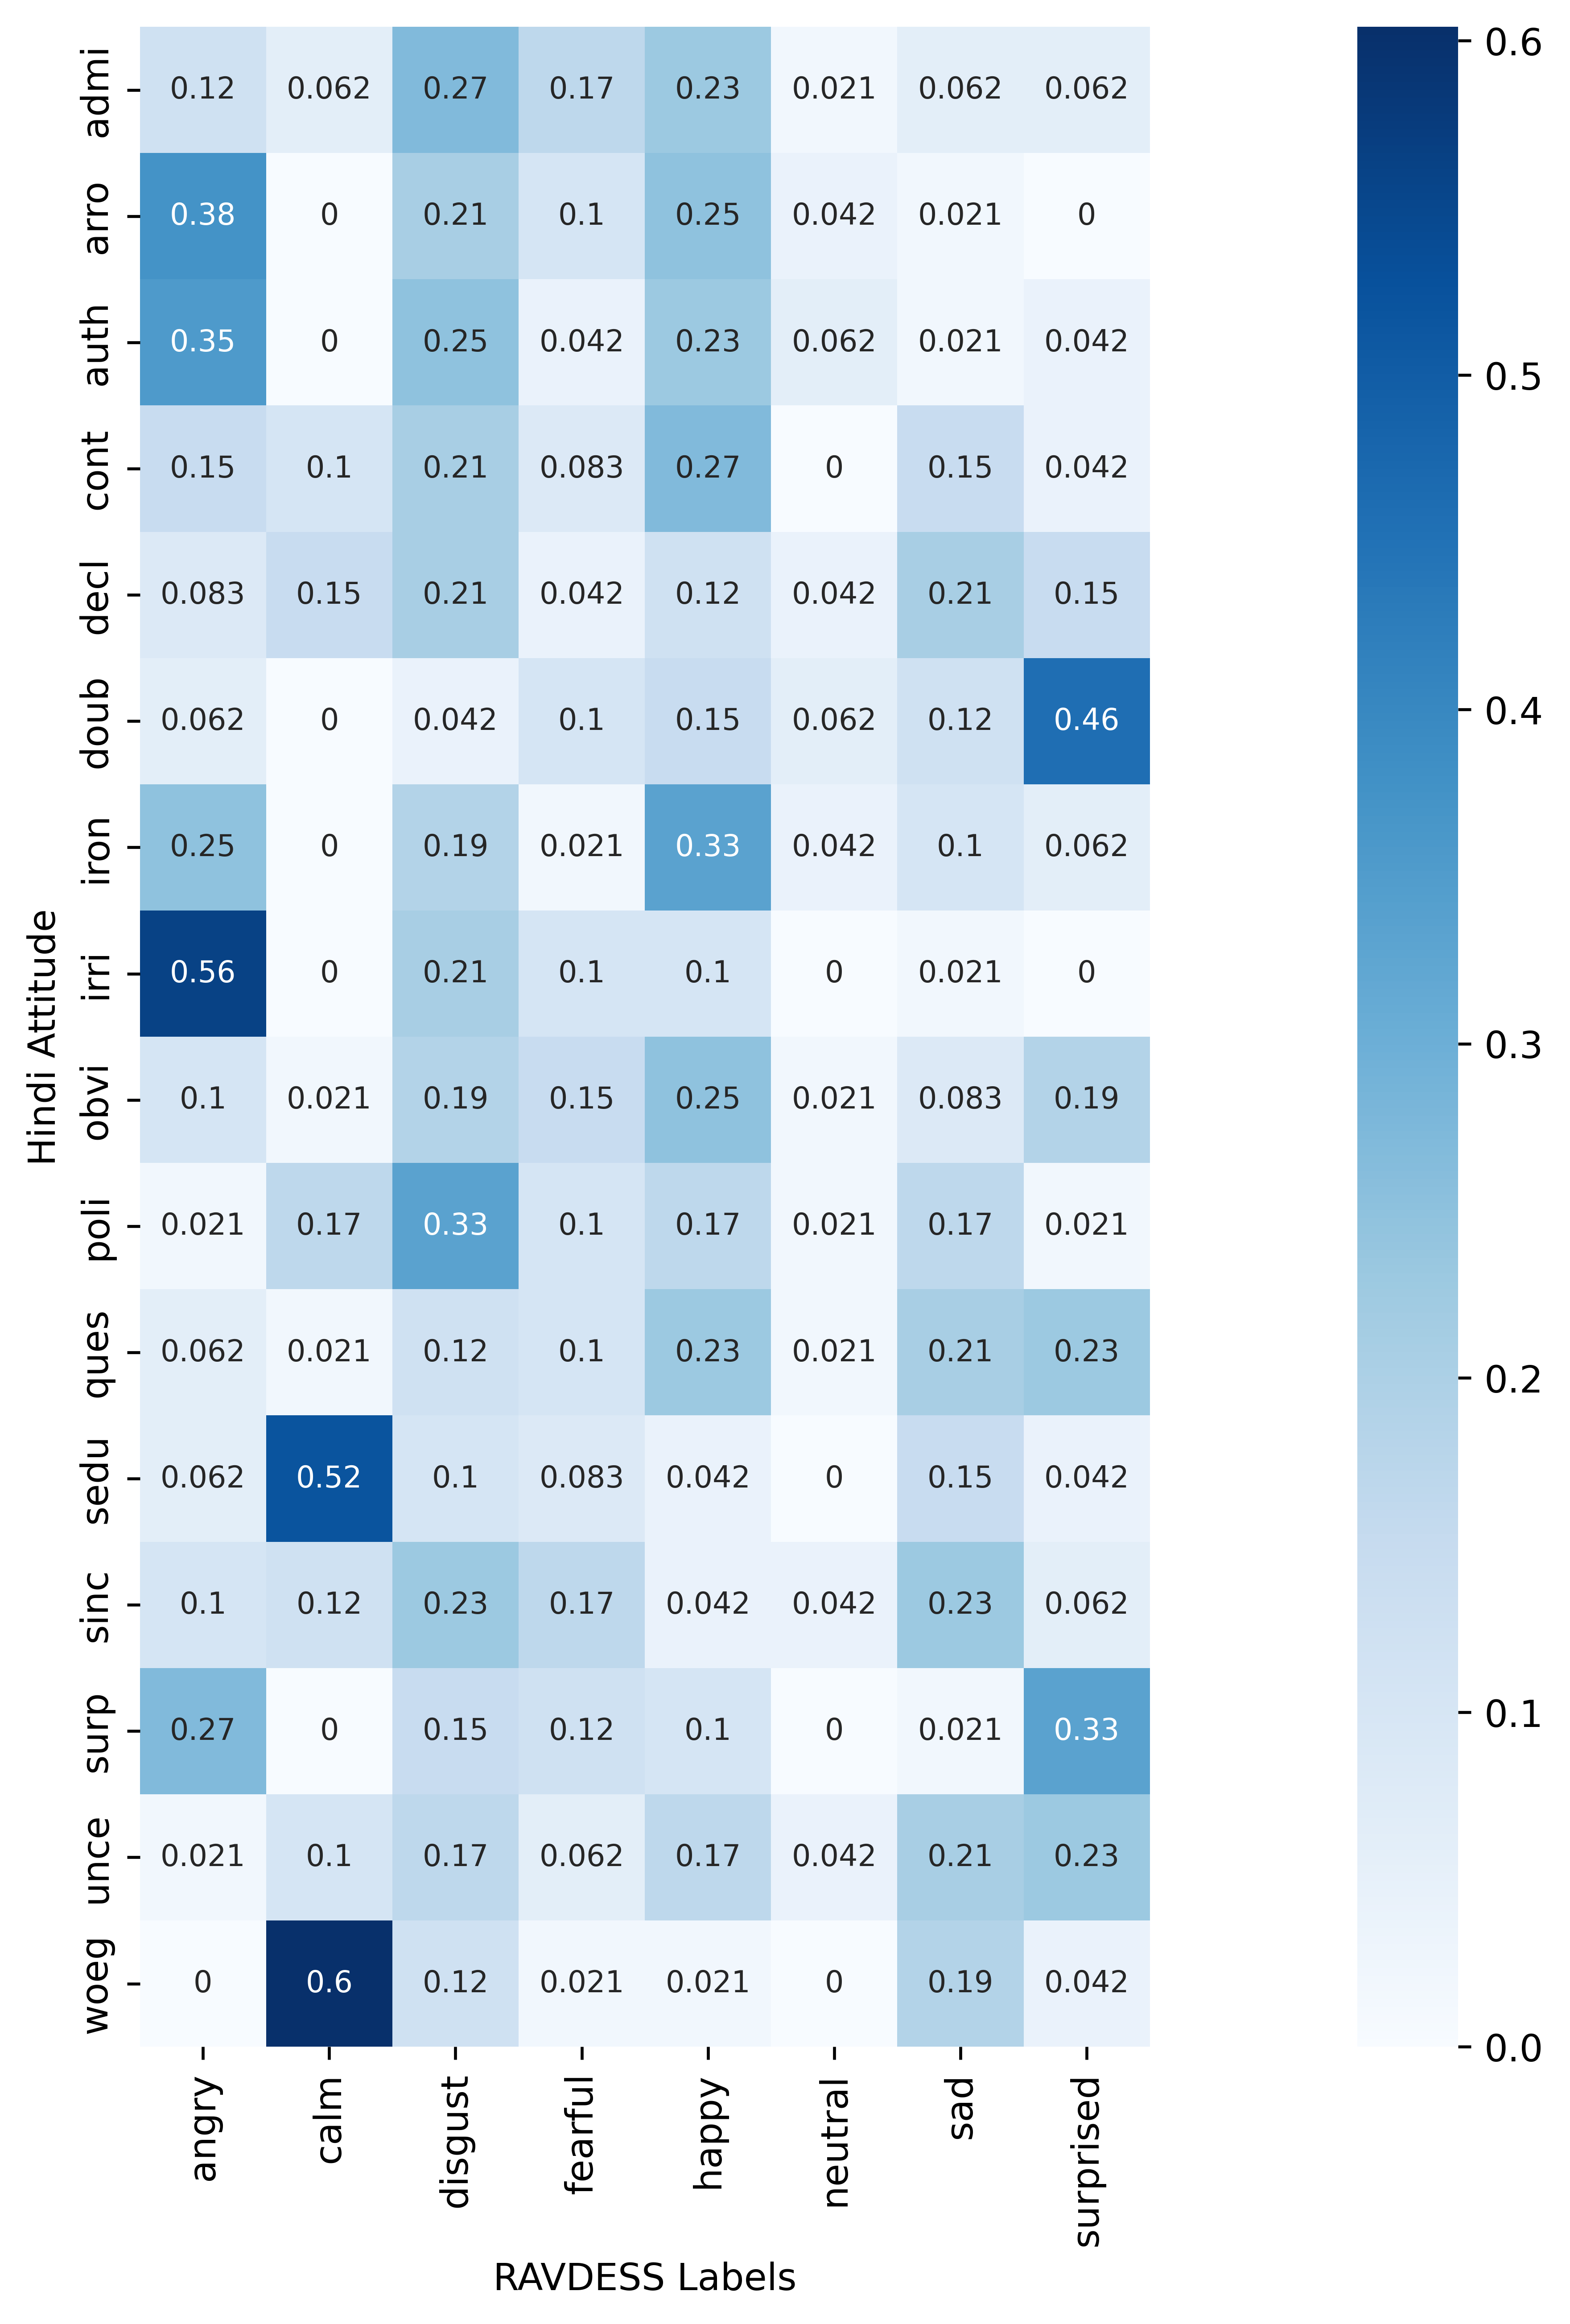

In [114]:
import seaborn as sns
plt.rcParams['figure.dpi'] = 600
plt.figure(figsize=(20,10))
sns.heatmap(df_labels_new_comp/df_labels_new_comp.sum(axis=1)[:, np.newaxis], cmap="Blues",square= True, annot=True, annot_kws={'size': 8})

In [248]:
# implementign a knn classifier
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(X_ravdess_transformed)


NearestNeighbors(n_neighbors=1)

In [249]:
kn = neigh.kneighbors(X_hindi_transformed, return_distance=False)

In [250]:
kn_class = [emotions[i[0]] for i in kn]

In [251]:
kn_class

['angry',
 'disgust',
 'surprised',
 'fearful',
 'fearful',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'happy',
 'happy',
 'happy',
 'disgust',
 'angry',
 'angry',
 'disgust',
 'disgust',
 'angry',
 'disgust',
 'fearful',
 'fearful',
 'angry',
 'angry',
 'angry',
 'disgust',
 'happy',
 'disgust',
 'angry',
 'angry',
 'angry',
 'angry',
 'happy',
 'happy',
 'angry',
 'disgust',
 'disgust',
 'calm',
 'fearful',
 'sad',
 'fearful',
 'angry',
 'angry',
 'disgust',
 'calm',
 'disgust',
 'calm',
 'sad',
 'disgust',
 'disgust',
 'fearful',
 'sad',
 'fearful',
 'happy',
 'angry',
 'angry',
 'disgust',
 'disgust',
 'fearful',
 'calm',
 'angry',
 'disgust',
 'disgust',
 'sad',
 'happy',
 'angry',
 'angry',
 'angry',
 'happy',
 'happy',
 'happy',
 'angry',
 'disgust',
 'happy',
 'angry',
 'angry',
 'disgust',
 'sad',
 'angry',
 'fearful',
 'surprised',
 'disgust',
 'disgust',
 'fearful',
 'angry',
 'disgust',
 'angry',
 'fearful',
 'happy',
 'surprised',
 'disgust',
 'disgust',
 'happy',


In [252]:
import pandas as pd
df_labels_new = pd.DataFrame()
df_labels_new["Hindi Attitude"] = attitude
df_labels_new["RAVDESS Labels"] = kn_class
df_labels_new_comp = pd.crosstab(df_labels_new["Hindi Attitude"], df_labels_new["RAVDESS Labels"])

C:\Users\HP\AppData\Local\Temp\ipykernel_25412\2183472157.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  sns.heatmap(df_labels_new_comp/df_labels_new_comp.sum(axis=1)[:, np.newaxis], cmap="Blues",square= True, annot=True, annot_kws={'size': 8})


<AxesSubplot:xlabel='RAVDESS Labels', ylabel='Hindi Attitude'>

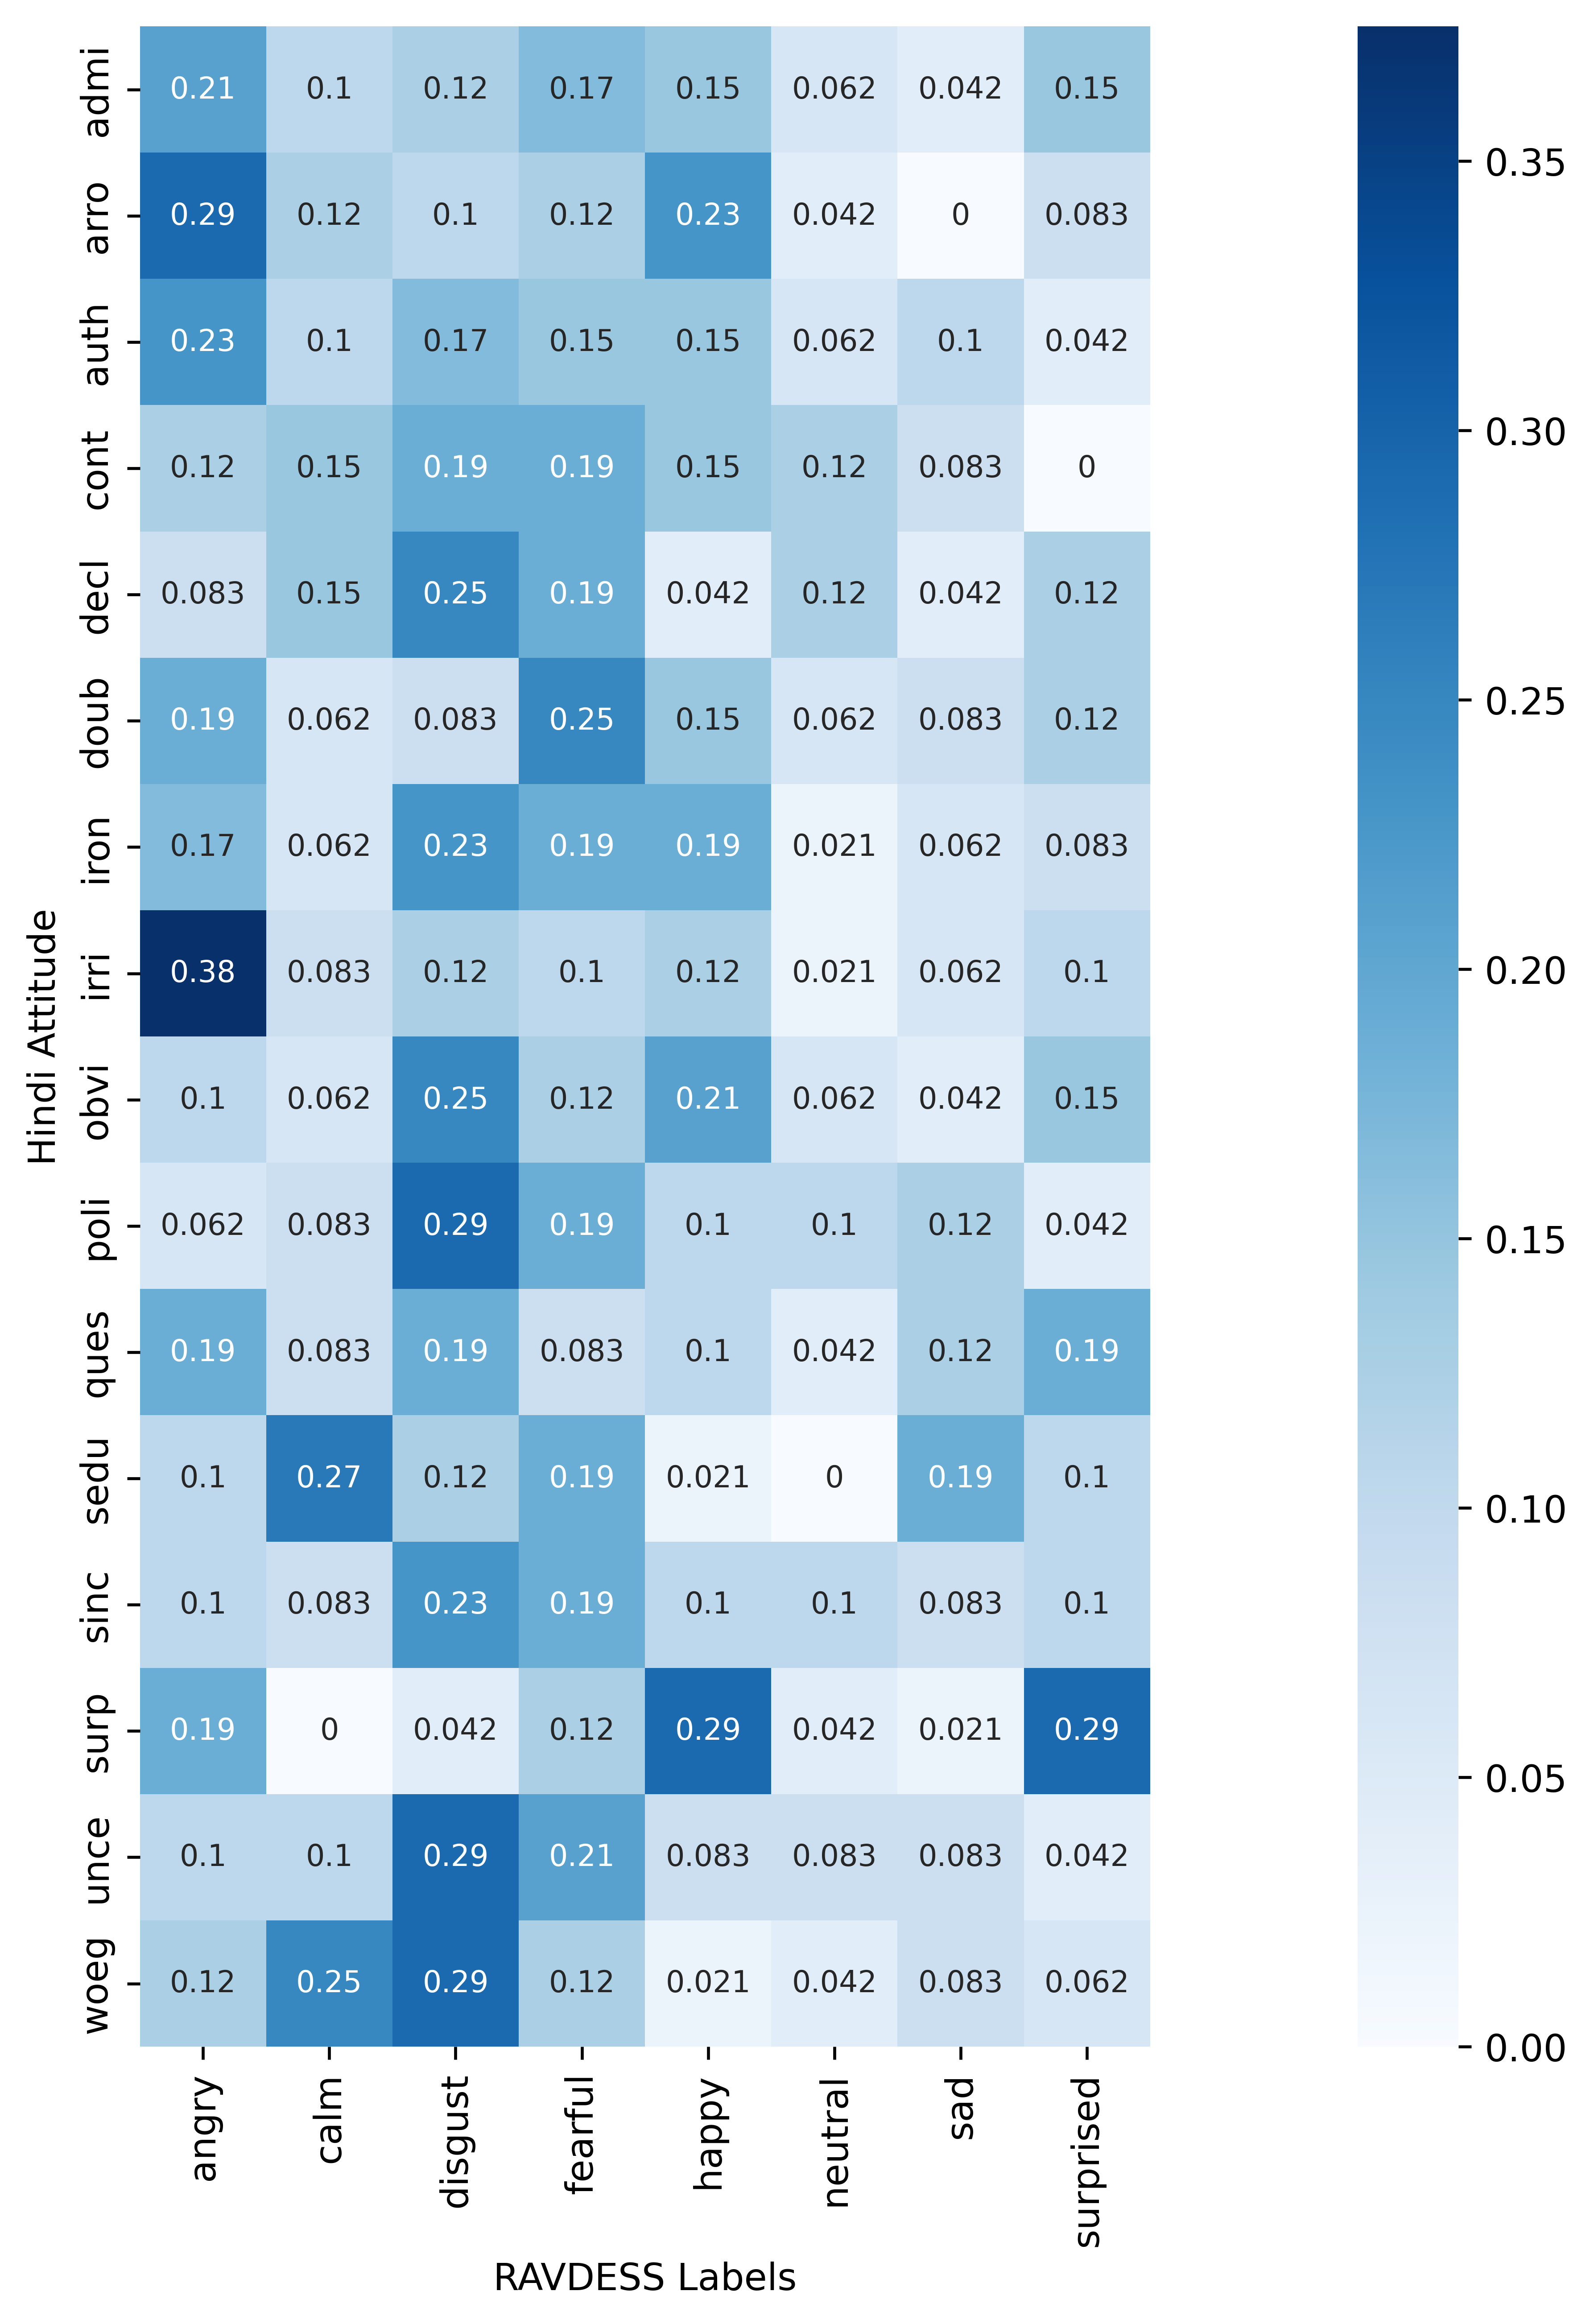

In [253]:
import seaborn as sns
plt.rcParams['figure.dpi'] = 600
plt.figure(figsize=(20,10))
sns.heatmap(df_labels_new_comp/df_labels_new_comp.sum(axis=1)[:, np.newaxis], cmap="Blues",square= True, annot=True, annot_kws={'size': 8})

# Loading the SAVEE dataset

In [126]:
X_savee,speaker_id_savee, file_name_savee, _ = utils.load_wav_features("C:\\Users\\HP\\Downloads\\AudioDataSAVEE\\AudioData\\")

In [127]:
emotion_savee = utils.process_savee(file_name_savee)

In [128]:
scaler = utils.StandardScaleNormalizer()
X_savee_norm = scaler.fit_transform(X_savee, speaker_id_savee)

In [156]:
X_t, X_saveee_pca, _  = pca(X_savee_norm, 60)

## Getting the transformation matrix

In [157]:
X_a = np.dot(np.dot(X_s, X_s.T), X_t)

In [158]:
X_ravdess_transformed = np.dot(X_ravdess_norm, X_a)
X_savee_transformed = np.dot(X_savee_norm, X_t)

In [159]:
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(X_ravdess_transformed)

NearestNeighbors(n_neighbors=1)

In [160]:
kn = neigh.kneighbors(X_savee_transformed, return_distance=False)

In [161]:
kn_class = [emotions[i[0]] for i in kn]

In [162]:
import pandas as pd
df_labels_new = pd.DataFrame()
df_labels_new["SAVEE Labels"] = emotion_savee
df_labels_new["RAVDESS Labels"] = kn_class
df_labels_new_comp = pd.crosstab(df_labels_new["SAVEE Labels"], df_labels_new["RAVDESS Labels"])

C:\Users\HP\AppData\Local\Temp\ipykernel_25412\2183472157.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  sns.heatmap(df_labels_new_comp/df_labels_new_comp.sum(axis=1)[:, np.newaxis], cmap="Blues",square= True, annot=True, annot_kws={'size': 8})


<AxesSubplot:xlabel='RAVDESS Labels', ylabel='SAVEE Labels'>

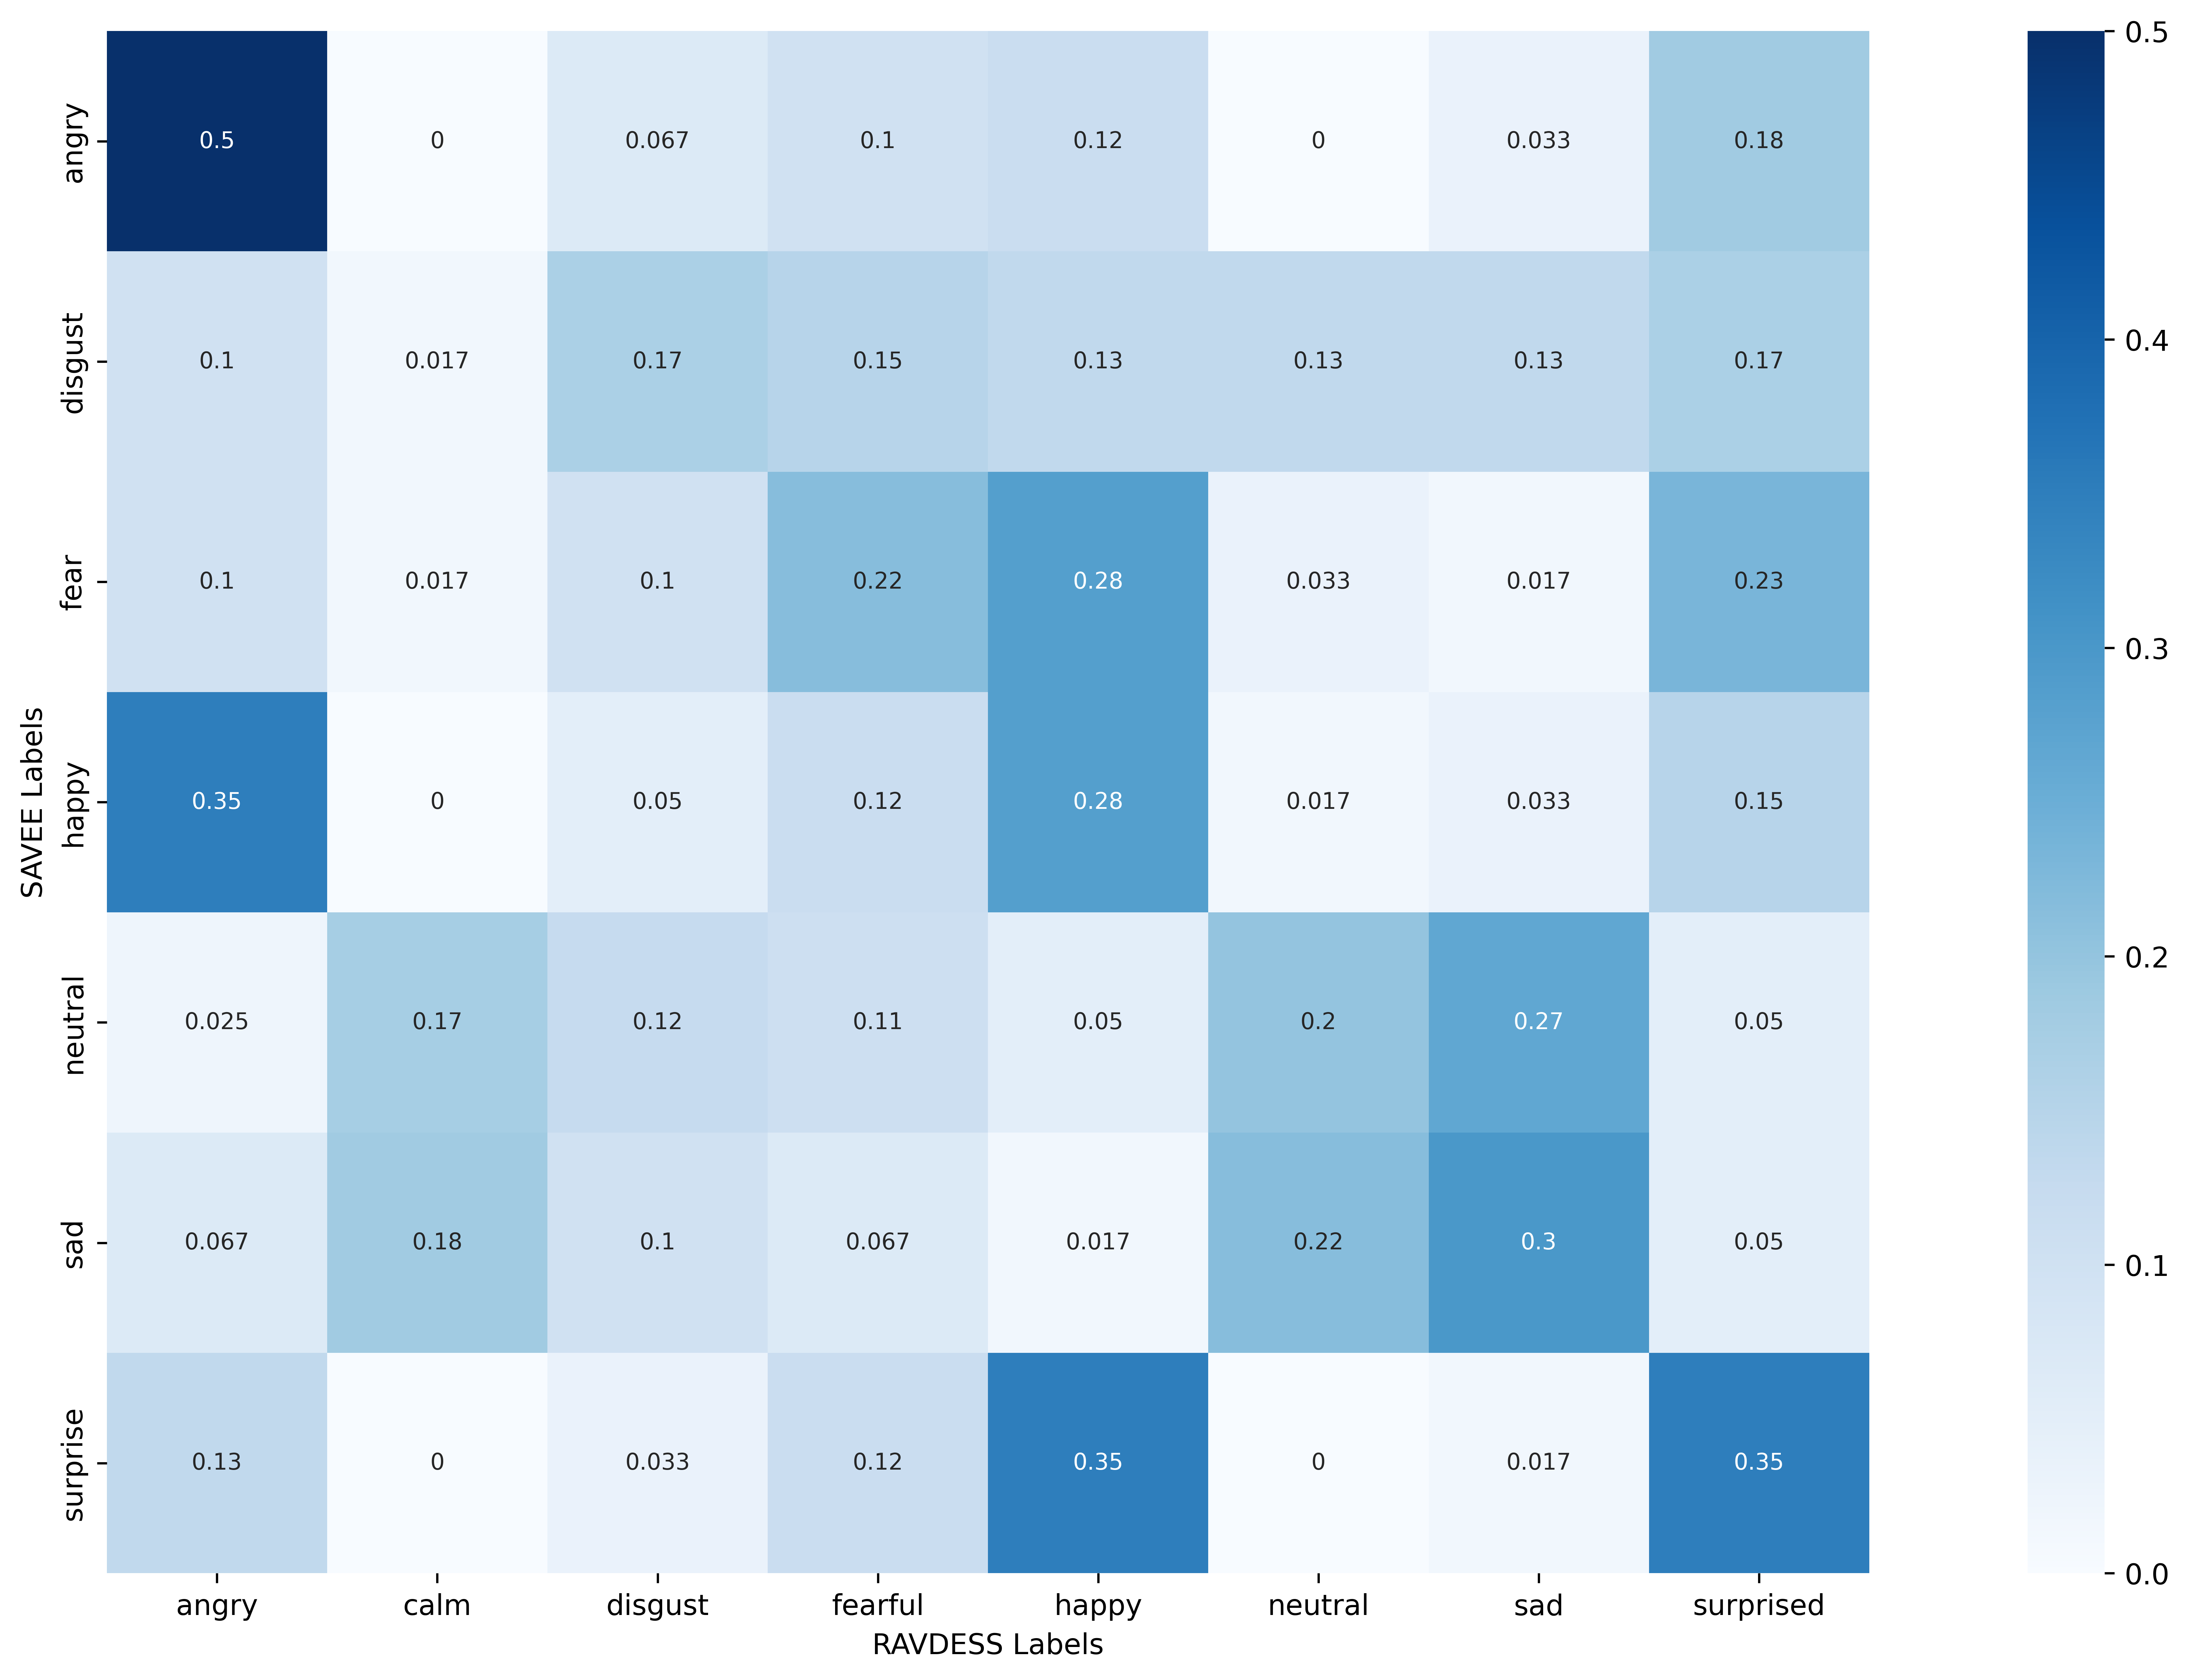

In [163]:
import seaborn as sns
plt.rcParams['figure.dpi'] = 600
plt.figure(figsize=(20,10))
sns.heatmap(df_labels_new_comp/df_labels_new_comp.sum(axis=1)[:, np.newaxis], cmap="Blues",square= True, annot=True, annot_kws={'size': 8})

PCA requires all the input matrices to be centered. We now try normalization normale - i.e. without speaker to speaker normalization

In [174]:
X_hindi_norm_wo =(X_hindi - X_hindi.mean(axis = 0))/(X_hindi.std(axis = 0))
X_savee_norm_wo = (X_savee - X_savee.mean(axis = 0))/(X_savee.std(axis = 0))
X_ravdess_norm_wo = (X_ravdess - X_ravdess.mean(axis = 0))/(X_ravdess.std(axis = 0))

In [178]:
X_s, X_ravdess_pca, _  = pca(X_ravdess_norm_wo, 60)


In [179]:
X_t, X_saveee_pca, _  = pca(X_savee_norm_wo, 60)

In [180]:
X_a = np.dot(np.dot(X_s, X_s.T), X_t)

In [181]:
X_ravdess_transformed = np.dot(X_ravdess_norm, X_a)
X_savee_transformed = np.dot(X_savee_norm, X_t)

In [182]:
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(X_ravdess_transformed)

NearestNeighbors(n_neighbors=1)

In [183]:
kn = neigh.kneighbors(X_savee_transformed, return_distance=False)

In [184]:
kn_class = [emotions[i[0]] for i in kn]

In [185]:
import pandas as pd
df_labels_new = pd.DataFrame()
df_labels_new["SAVEE Labels"] = emotion_savee
df_labels_new["RAVDESS Labels"] = kn_class
df_labels_new_comp = pd.crosstab(df_labels_new["SAVEE Labels"], df_labels_new["RAVDESS Labels"])

C:\Users\HP\AppData\Local\Temp\ipykernel_25412\2183472157.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  sns.heatmap(df_labels_new_comp/df_labels_new_comp.sum(axis=1)[:, np.newaxis], cmap="Blues",square= True, annot=True, annot_kws={'size': 8})


<AxesSubplot:xlabel='RAVDESS Labels', ylabel='SAVEE Labels'>

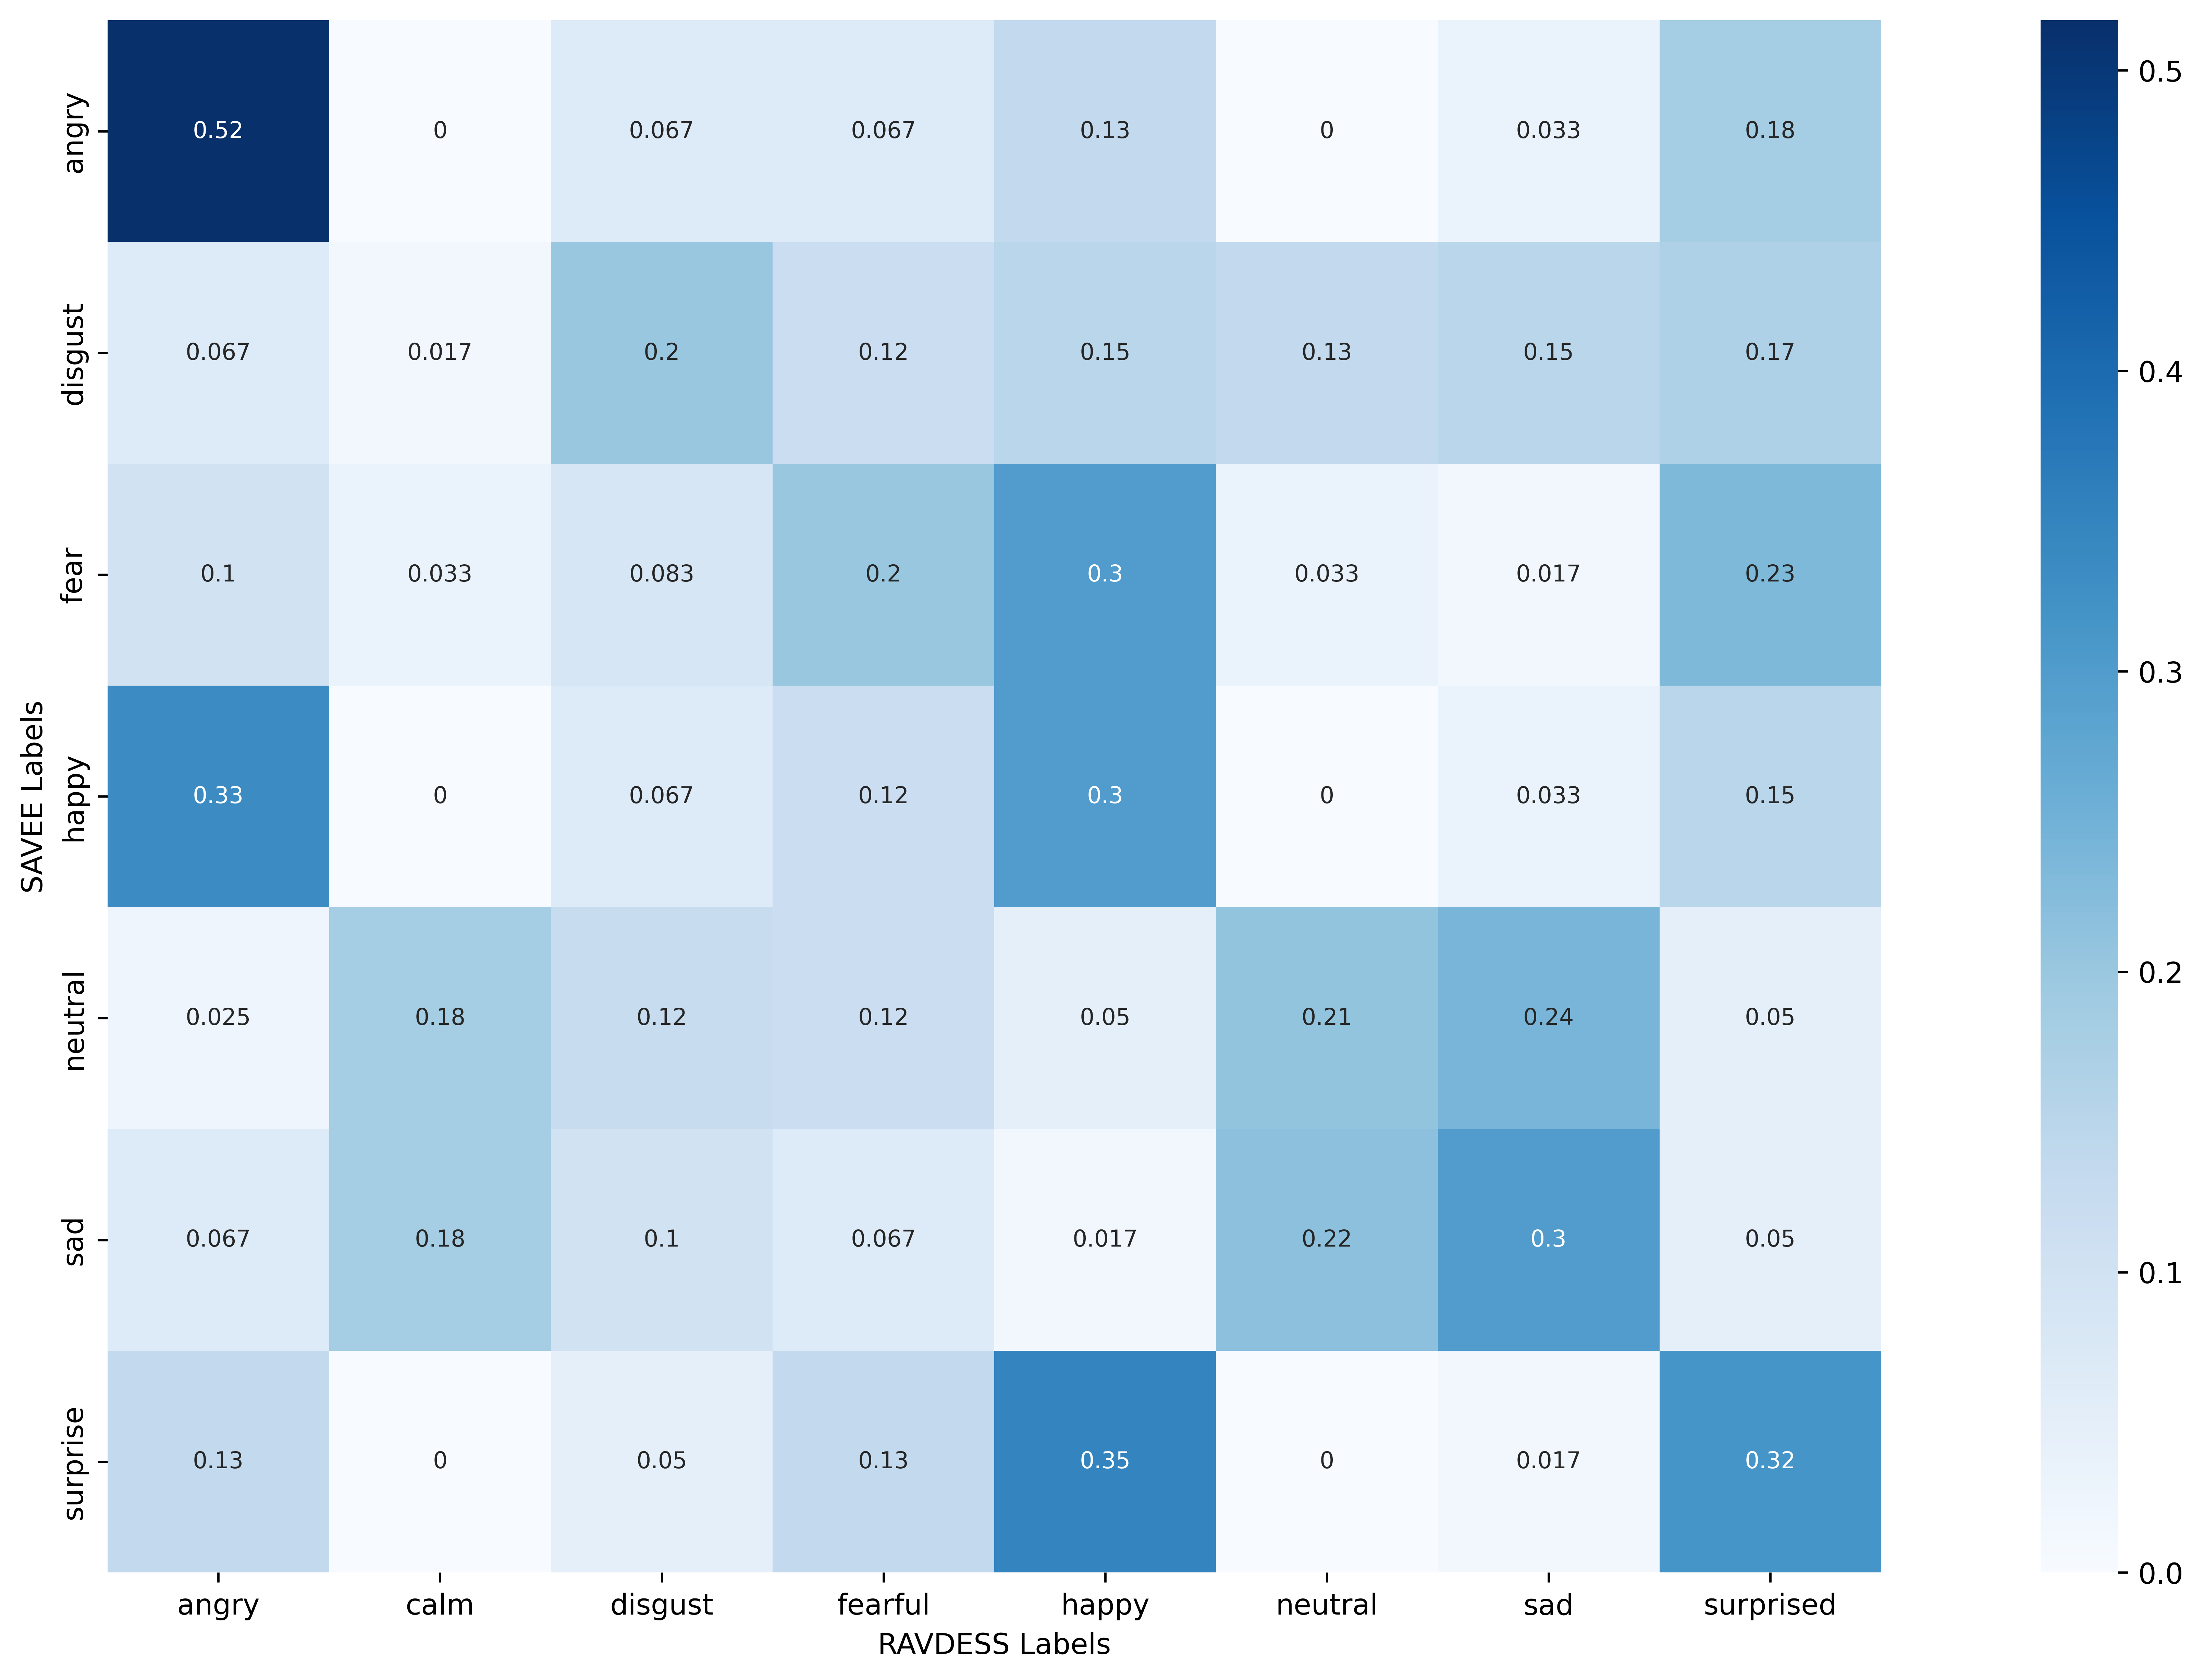

In [186]:
import seaborn as sns
plt.rcParams['figure.dpi'] = 600
plt.figure(figsize=(20,10))
sns.heatmap(df_labels_new_comp/df_labels_new_comp.sum(axis=1)[:, np.newaxis], cmap="Blues",square= True, annot=True, annot_kws={'size': 8})

Text(0.5, 1.0, 'transformed data centered and scaled')

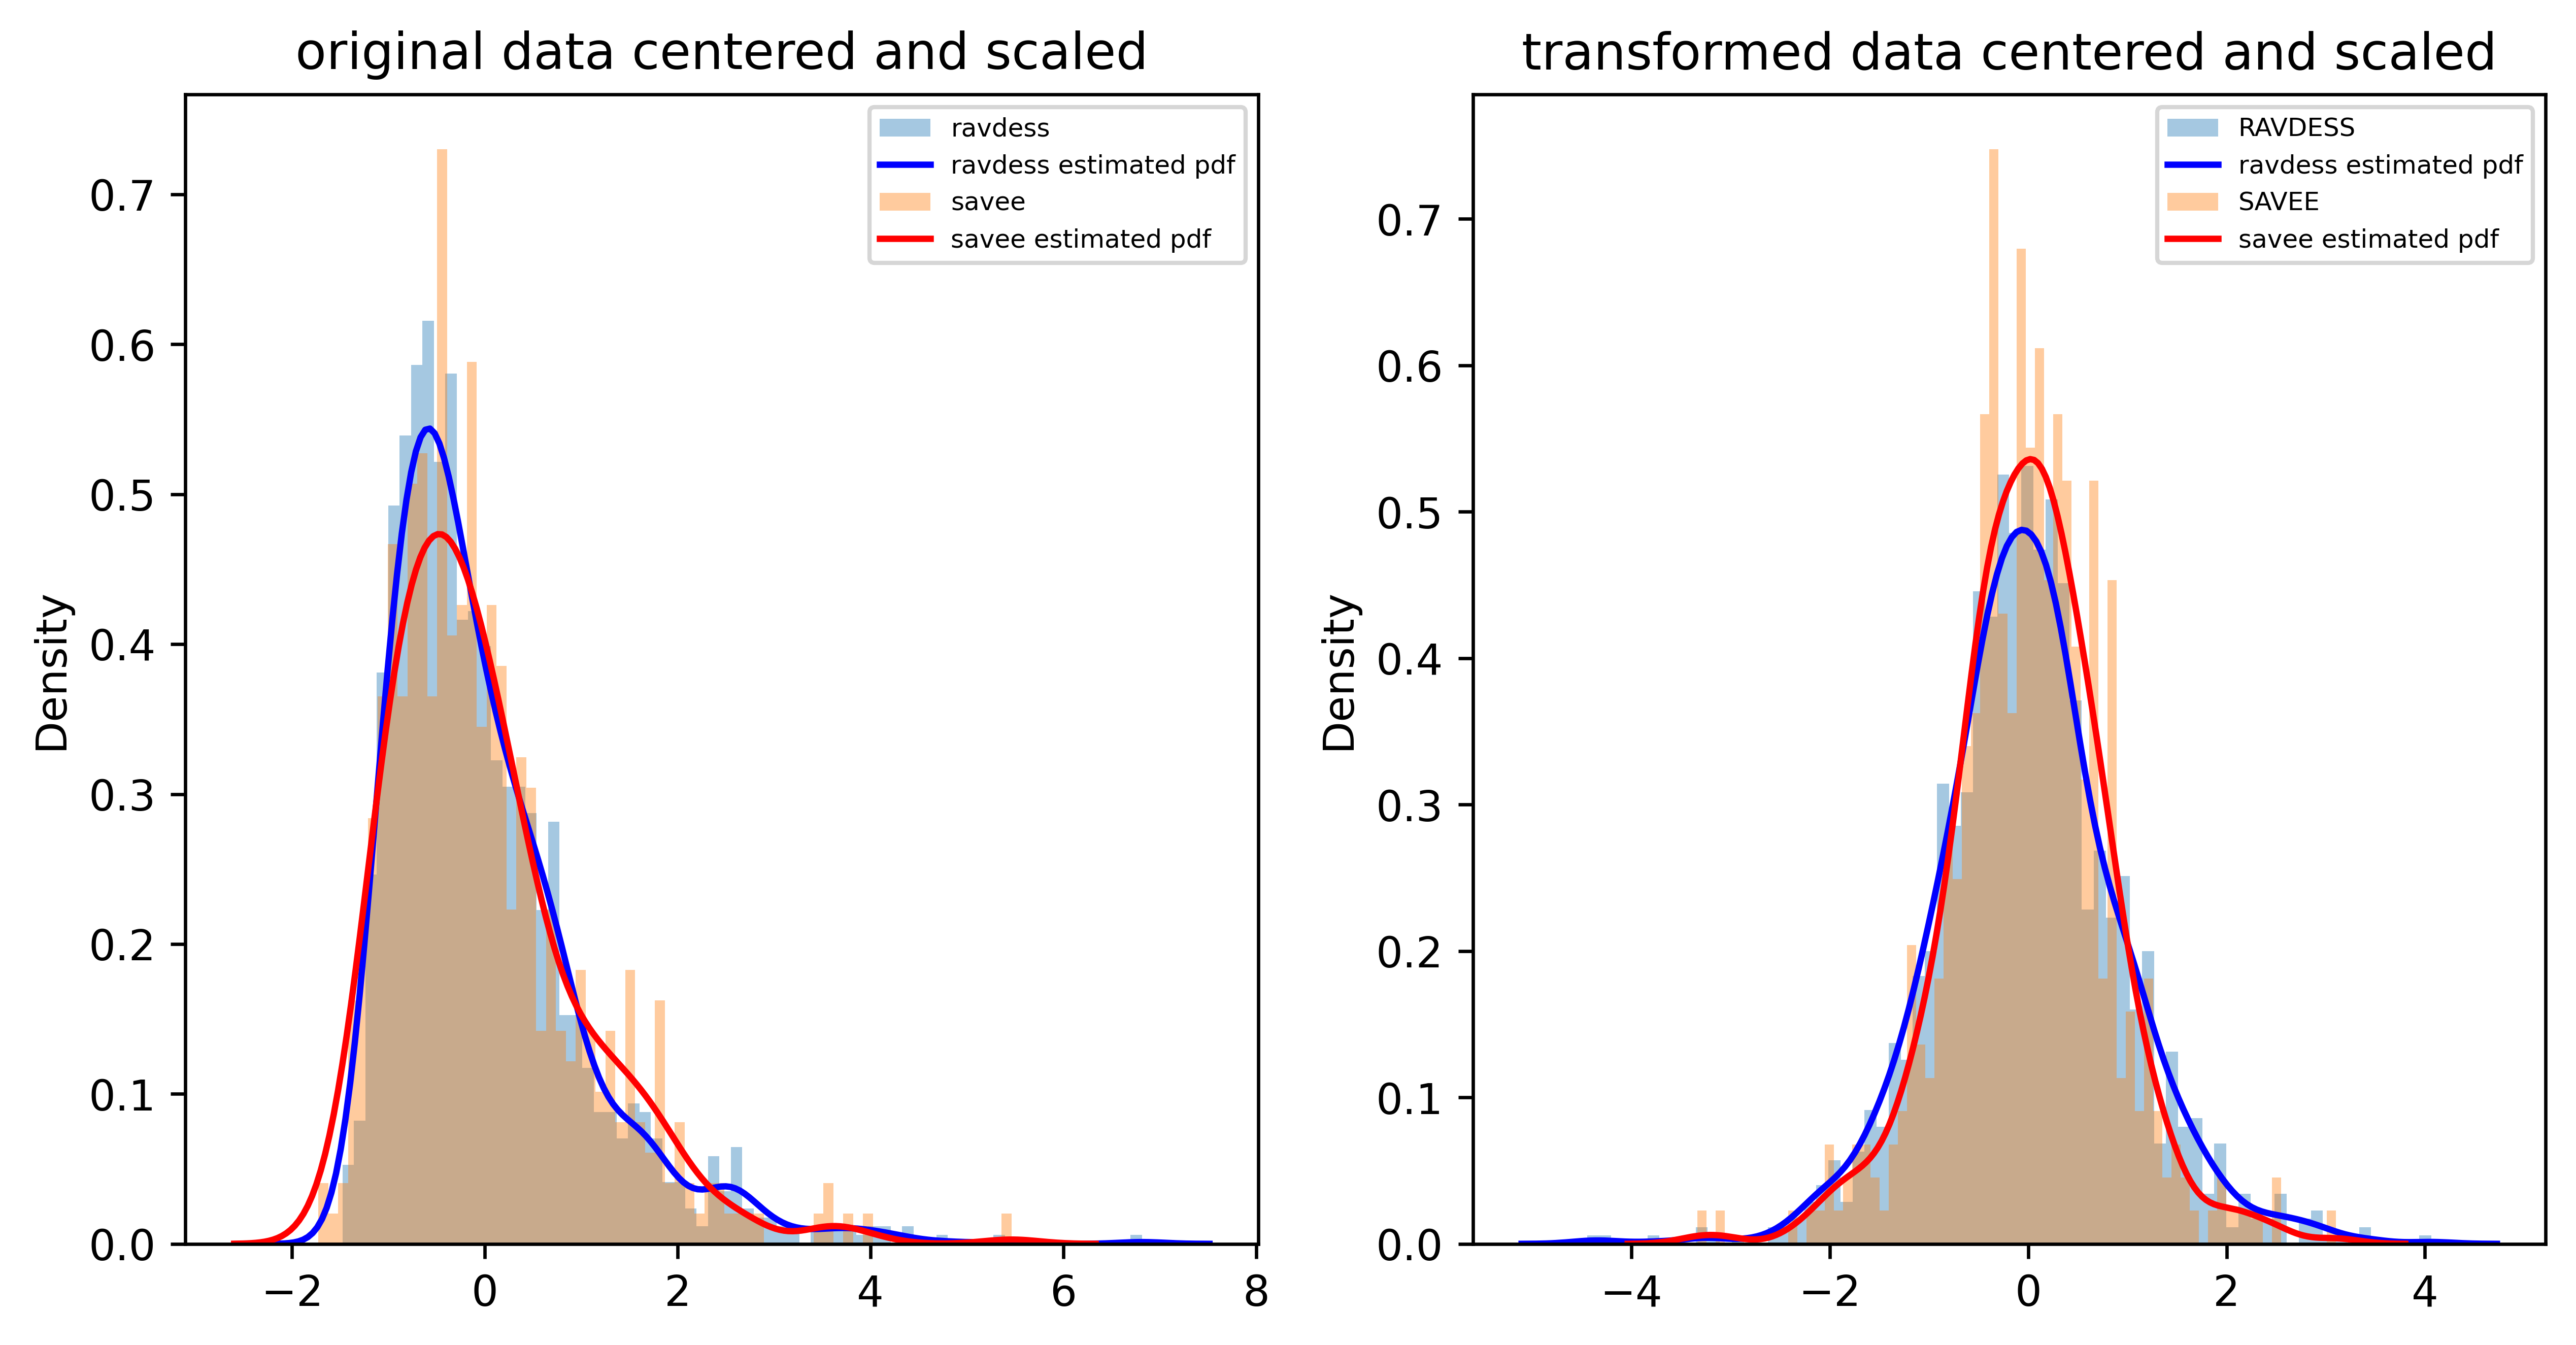

In [220]:
ind = 30
plt.figure(figsize = (10, 5))
plt.suptitle("Comparison of distributions of the RAVDESS and SAVEE datasets")
plt.subplot(1,2,1)
plt.hist(X_ravdess_norm_wo[:, ind], bins=70, density=True, alpha = 0.4, label = "ravdess");
sns.kdeplot(X_ravdess_norm_wo[:, ind], color = 'b', label = "ravdess estimated pdf")
plt.hist(X_savee_norm_wo[:, ind], bins=70, density=True, alpha = 0.4, label = "savee");
sns.kdeplot(X_savee_norm_wo[:, ind], color = 'r', label = "savee estimated pdf")
plt.legend(fontsize = 6)
plt.title("original data centered and scaled")
plt.subplot(1,2,2)
plt.hist(X_ravdess_transformed[:, ind],  bins=70, density=True, alpha = 0.4, label = "RAVDESS");
sns.kdeplot(X_ravdess_transformed[:, ind], color = 'b', label = "ravdess estimated pdf")
plt.hist(X_savee_transformed[:, ind], bins=70, density=True, alpha = 0.4, label = "SAVEE");
sns.kdeplot(X_savee_transformed[:, ind], color = 'r', label = "savee estimated pdf")
plt.legend(fontsize = 6)
plt.title("transformed data centered and scaled")

Text(0.5, 1.0, 'transformed data centered and scaled')

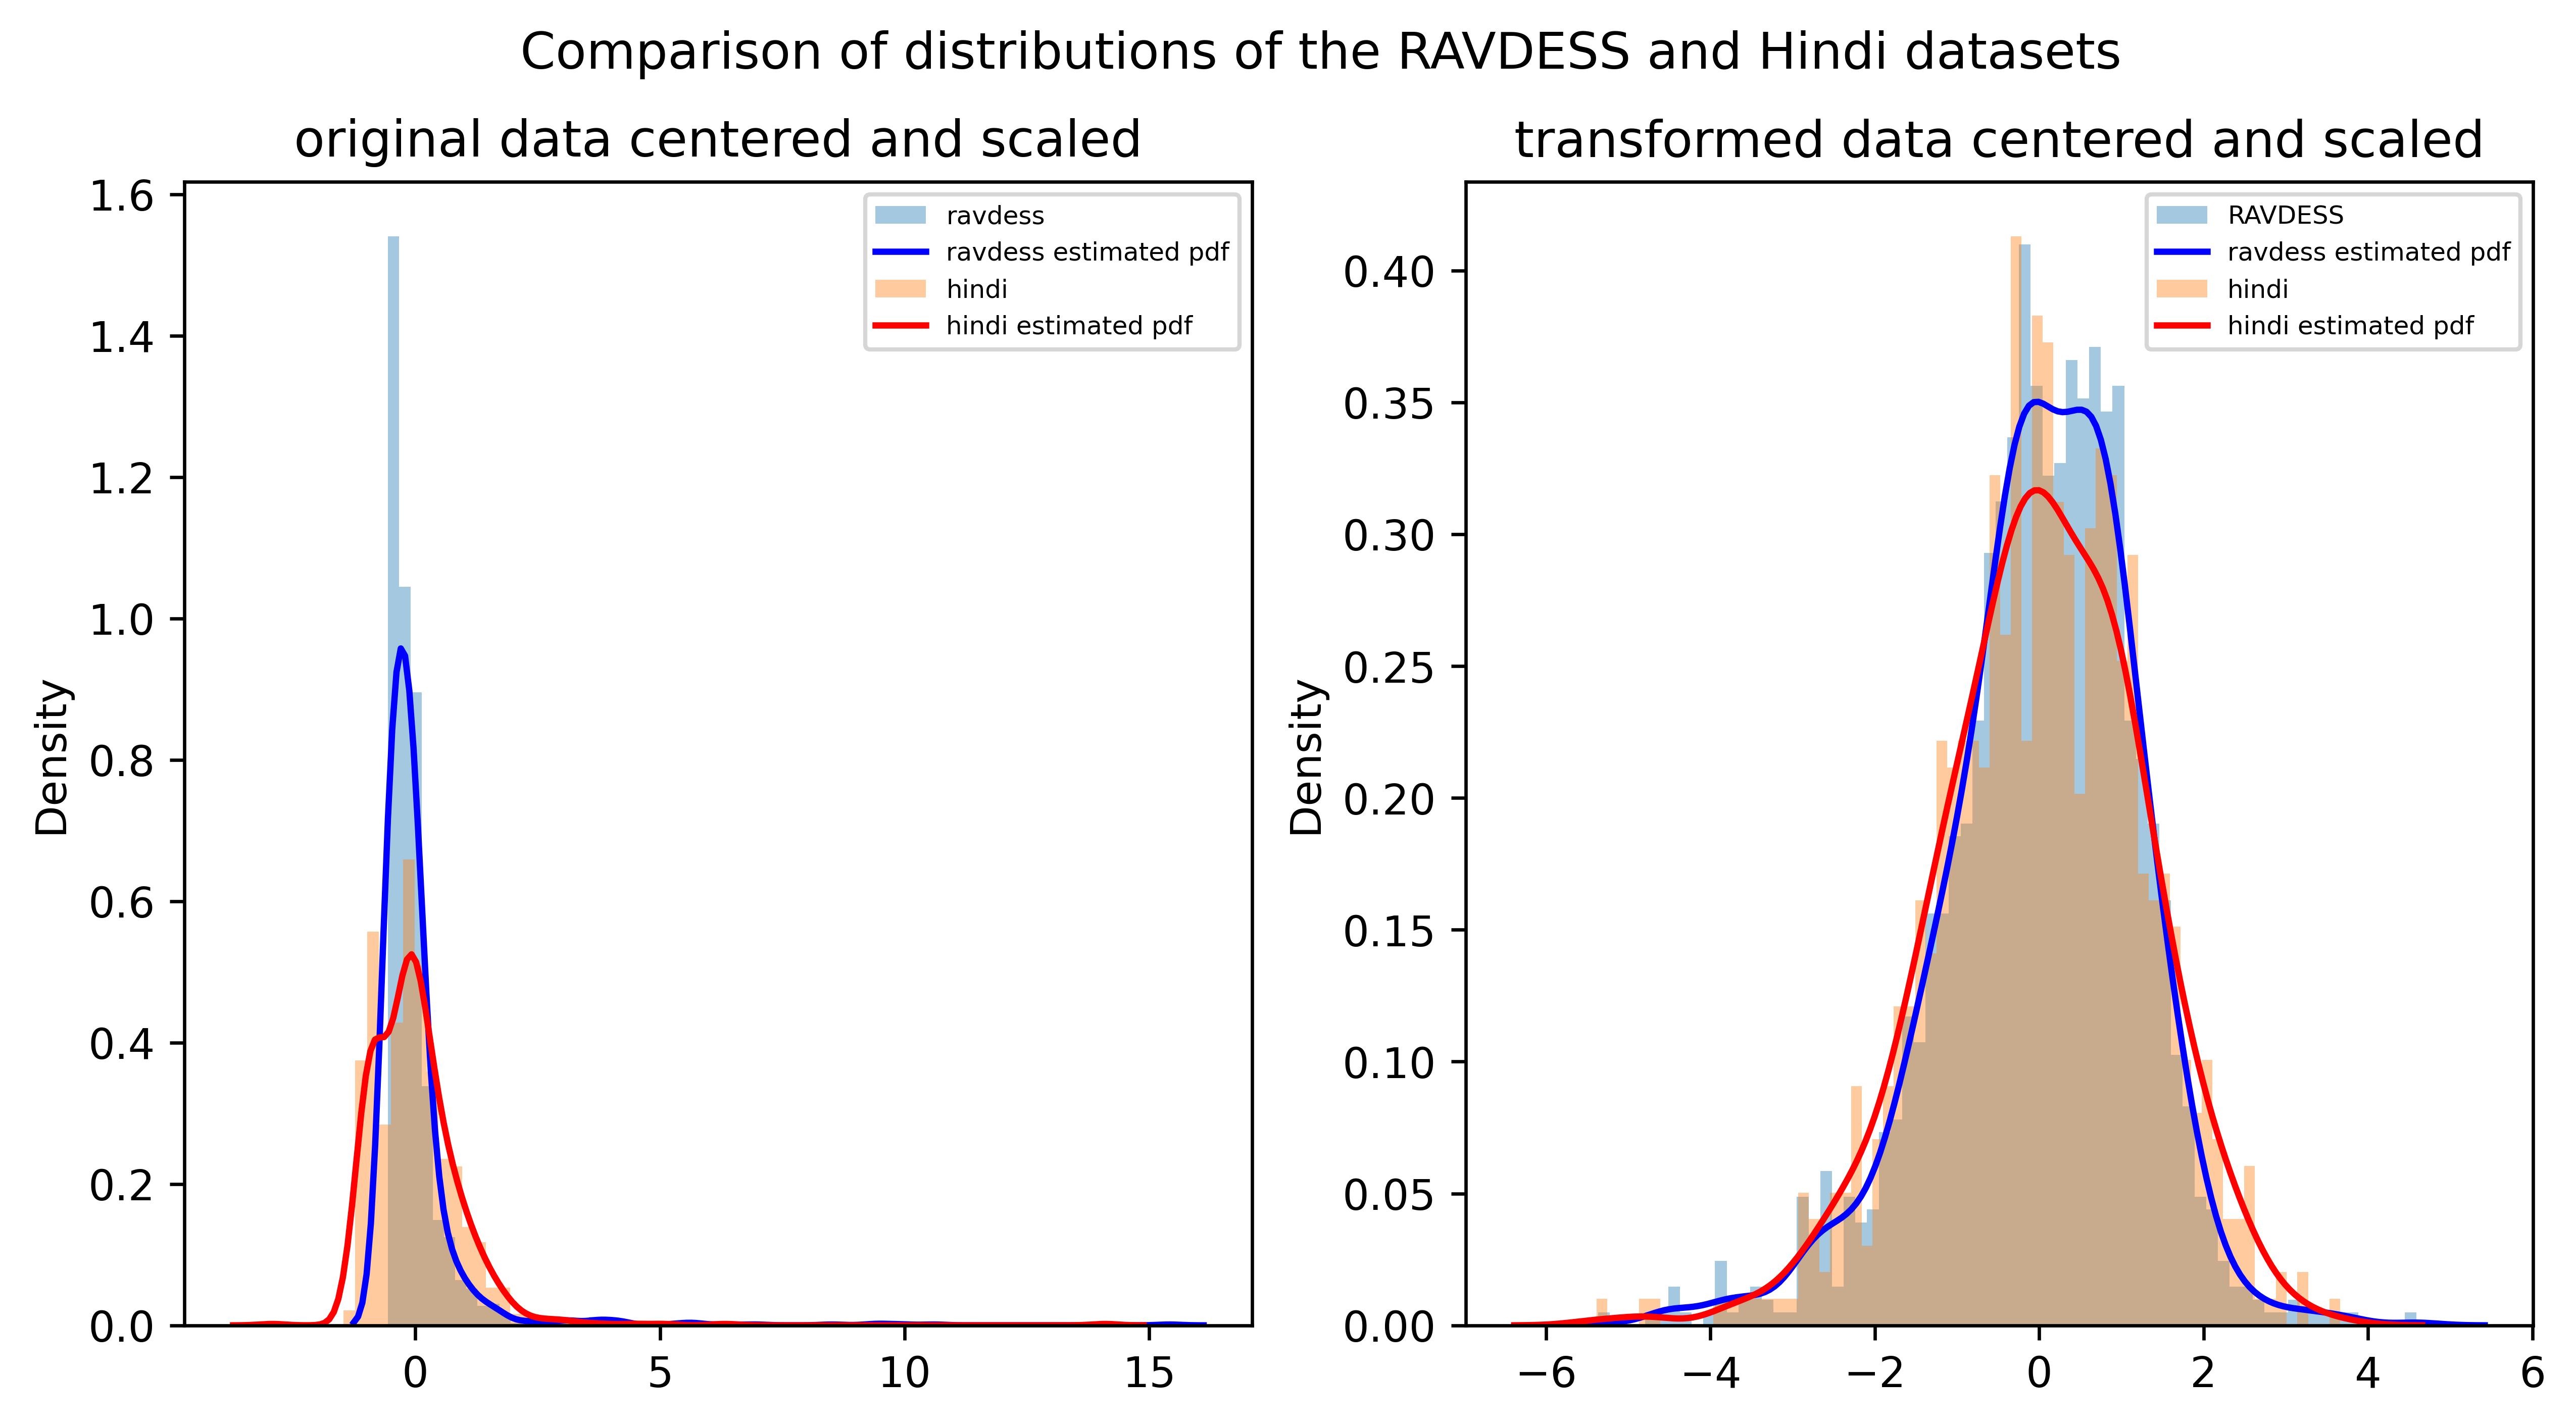

In [235]:
ind = 12
plt.figure(figsize = (10, 5))
plt.suptitle("Comparison of distributions of the RAVDESS and Hindi datasets")
plt.subplot(1,2,1)
plt.hist(X_ravdess_norm_wo[:, ind], bins=70, density=True, alpha = 0.4, label = "ravdess");
sns.kdeplot(X_ravdess_norm_wo[:, ind], color = 'b', label = "ravdess estimated pdf")
plt.hist(X_hindi_norm_wo[:, ind], bins=70, density=True, alpha = 0.4, label = "hindi");
sns.kdeplot(X_hindi_norm_wo[:, ind], color = 'r', label = "hindi estimated pdf")
plt.legend(fontsize = 6)
plt.title("original data centered and scaled")
plt.subplot(1,2,2)
plt.hist(X_ravdess_transformed[:, ind],  bins=70, density=True, alpha = 0.4, label = "RAVDESS");
sns.kdeplot(X_ravdess_transformed[:, ind], color = 'b', label = "ravdess estimated pdf")
plt.hist(X_hindi_transformed[:, ind], bins=70, density=True, alpha = 0.4, label = "hindi");
sns.kdeplot(X_hindi_transformed[:, ind], color = 'r', label = "hindi estimated pdf")
plt.legend(fontsize = 6)
plt.title("transformed data centered and scaled")